In [1]:
import pandas as pd
import datetime

In [2]:
#First we should cehck the Autocorrelation of APPL Stock since we are using a regression model
df = pd.read_csv("../data/processed/appl_stock_values.csv")

#split the data
df["Date"] = pd.to_datetime(df["Date"])
test = df[df["Date"] > datetime.datetime(2021, 5, 1)]
train = df[df["Date"] <= datetime.datetime(2021, 5, 1)]






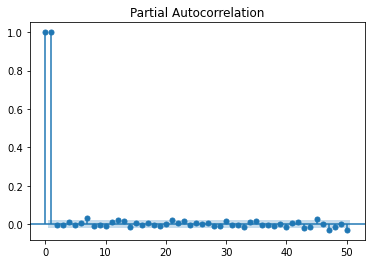

In [3]:
#use PACF to find ideal P value
#we will just use the closing values for now
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

plot_pacf(train["Close"], lags=50)
plt.show()

We can see that the stock price is correlated strongly at a time lag of 1, (ie yesterdays price) howevever there is not much correlation between the price of two days ago. In the AFC plot you will see the correlation from the prevouse day carry over.

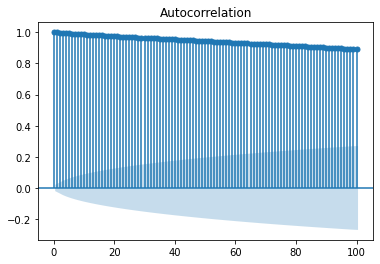

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df["Close"], lags= 100)
plt.show()

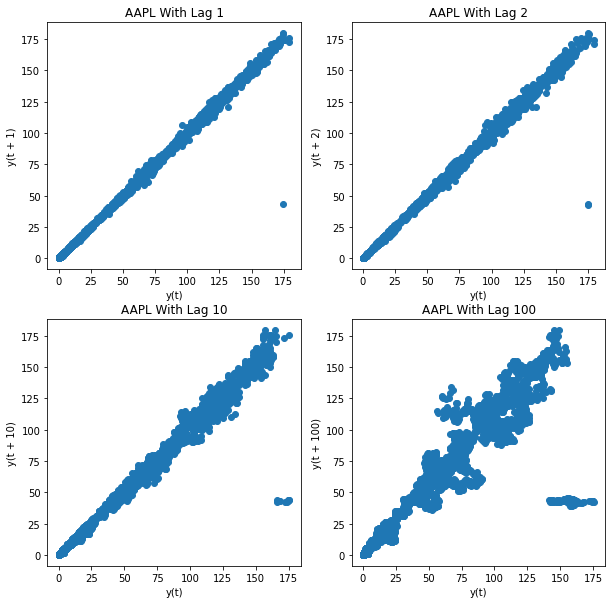

In [5]:
from pandas.plotting import lag_plot


fig, axes = plt.subplots(nrows=2, ncols=2, figsize= (10,10))
lag_plot(df["Close"], lag=1, ax=axes[0,0])
lag_plot(df["Close"], lag=2, ax=axes[0,1])
lag_plot(df["Close"], lag=10, ax=axes[1,0])
lag_plot(df["Close"], lag=100, ax=axes[1,1])
axes[0,0].title.set_text("AAPL With Lag 1")
axes[0,1].title.set_text("AAPL With Lag 2")
axes[1,0].title.set_text("AAPL With Lag 10")
axes[1,1].title.set_text("AAPL With Lag 100")

plt.show()

In [9]:
#build the AR Model with lag 1
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.metrics import mean_squared_error
from math import sqrt

model = AutoReg(train["Close"], lags = 5, old_names=False)
model_fit = model.fit()
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 9233
Model:                     AutoReg(5)   Log Likelihood              -17372.737
Method:               Conditional MLE   S.D. of innovations              1.590
Date:                Fri, 24 Dec 2021   AIC                              0.929
Time:                        13:24:28   BIC                              0.934
Sample:                             5   HQIC                             0.931
                                 9233                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0261      0.020      1.307      0.191      -0.013       0.065
Close.L1       0.9982      0.010     95.884      0.000       0.978       1.019
Close.L2       0.0088      0.015      0.598      0.5

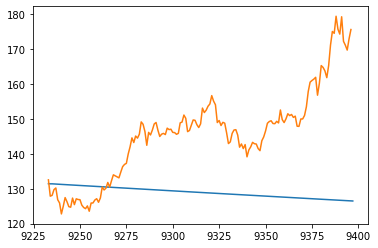

9233    131.443165
9234    131.395717
9235    131.398327
9236    131.360495
9237    131.329675
           ...    
9393    126.594652
9394    126.565330
9395    126.536021
9396    126.506724
9397    126.477440
Length: 165, dtype: float64

In [12]:
pred = model_fit.predict(start=len(train), end=len(train) + len(test),dynamic=False)
plt.plot(pred)
plt.plot(test["Close"])
plt.show()
pred

c:\Users\BrianBeinBrohan\projects\pytorch tutorials\env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


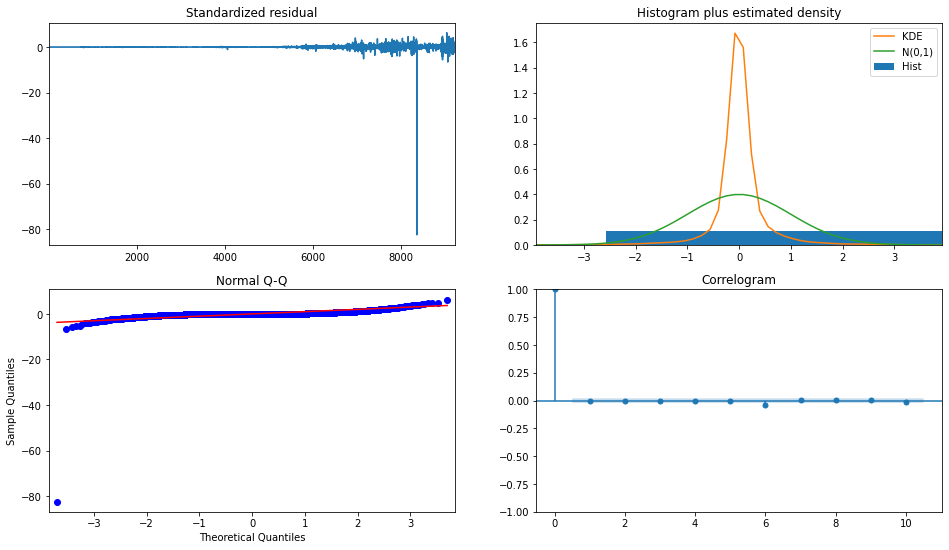

In [11]:
fig = plt.figure(figsize=(16, 9))
fig = model_fit.plot_diagnostics(fig=fig, lags=10)